## Statistics

Why should you, a private citizen, care about learning statistics when you don't need it directly in your profession? Because statistics is the science of data and uncertainty, and we live in a world filled with both. It is a very general and applicable discipline. It can be very complicated and obscure at times, especially at higher levels, but a firm understanding of the basics is within most peoples reach and very valuable.

In [2]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import statistics as st
import seaborn as sns

### Descriptive Statistics

Population **parameters** describe the **distribution** of values in a population.

#### Central tendency: 

* mean
* median
* mode

#### Spread: 

* variance
    - population variance
    - sample variance
* standard deviation
    - population standard deviation
    - sample standard deviation

#### Shape:

* skewness (tail length and fatness, directionality)
* kurtosis (peak sharpness) 

Though these are helpfull, nothing really beats seeing the whole thing. So if you can, show the entire distribution (e.g. histogram) AND the population parameters.

1. https://en.wikipedia.org/wiki/Skewness
2. https://en.wikipedia.org/wiki/Kurtosis
3. https://en.wikipedia.org/wiki/Moment_(mathematics)#Significance_of_the_moments

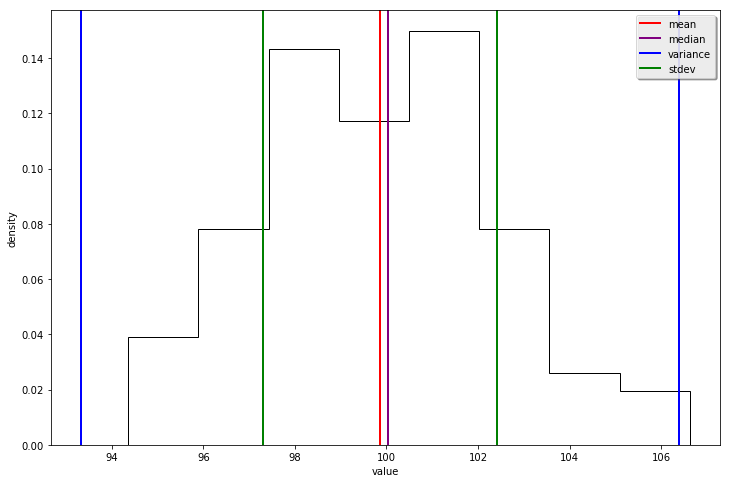

In [121]:
# All population statistics

sample_size = 100

pop_mean = 100
pop_stdev = 3

population = stats.norm.rvs(size=sample_size, 
                        loc=pop_mean, 
                        scale=pop_stdev)

mean = st.mean(population)
median = st.median(population)
variance = st.pvariance(population)
stdev = st.pstdev(population)

plt.figure(figsize=(12,8))

plt.hist(population, histtype='step', edgecolor='black', bins='auto',  normed=True)

plt.axvline(mean, color='red', linewidth=2, label='mean')

plt.axvline(median, color='purple', linewidth=2, label='median')

plt.axvline(mean + variance, color='blue', linewidth=2, label='variance')
plt.axvline(mean - variance, color='blue', linewidth=2)

plt.axvline(mean + stdev, color='green', linewidth=2, label='stdev')
plt.axvline(mean - stdev, color='green', linewidth=2)

plt.legend(shadow=True)
plt.xlabel('value')
plt.ylabel('density')

plt.show()

Distributions are data and how they are spread. Probability distributions are distributions where all values sum to 1. There exists idealized distributions which actual distributions might approximate. The normal (Gaussian) distributions is one of those.

A random variable's probability distribution is the distribution of values we would have if we repeated the experiment an infinite number of times. A random variables probability distributions describe its underlying propensities.

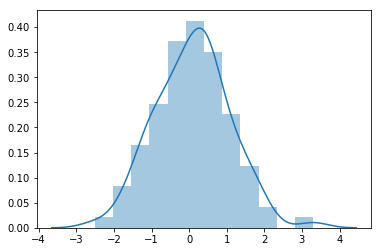

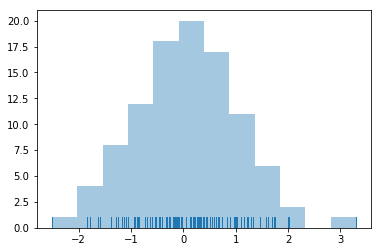

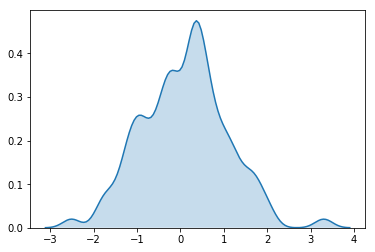

In [7]:
import seaborn as sns

x = np.random.normal(size=100)

plt.figure(1)
sns.distplot(x)

plt.figure(2)
sns.distplot(x, kde=False, rug=True)


plt.figure(3)
sns.kdeplot(x, bw=0.2, shade=True)

plt.show()

### Statistical Inference

#### Estimation

Estimation is about using samples to gain knowledge about populations. Some estimators are biased while some are unbiased. Being unbiased means that on average, the estimator is correct.

###### Point Estimates

Point estimates does not contain information about the uncertainty of the estimation.

* Mean
* Median
* Variance
    - Population Variance (biased)
    - Sample Variance (unbiased)
* Standard Deviation

###### Interval Estimates

Confidence intervals gives more information about the uncertainty of a certain estimation.

* Confidence Interval

#### Hypothesis Testing

A *null hypothesis* is an accepted fact. An alternative hypothesis is an informed guess that differs from the null hypothesis. Hypothesis testing is a statistical way of finding out wether the null hypothesis is falsified by the data or not. Falsifying it would make the alternative hypothesis more likely (by elimination of competition).

The null and alternative hypothesis must be specified in terms of some parameter. The population mean might be 0 under the null hypothesis and 20 under the alternative hypothesis. We could then draw a sample, take the mean of the sample, and then determine how unlikely it would be that the sample mean were that value given that the null hypothesis were true. If the data is too improbable, given the null, we reject the null. The improbability level we reject at is usually set to 5%, but you can set it to anything reasonable.

It is clear to see that in sampling many times and performing hypothesis testing, the sample is random. Just because it fails one test doesn't mean we should just reject the null hypothesis. If we were to sample many times, we could determine on average how often it produces null-rejecting results, and thus have a sturdier rejection, if that is the case.

* Z-test
* T-test

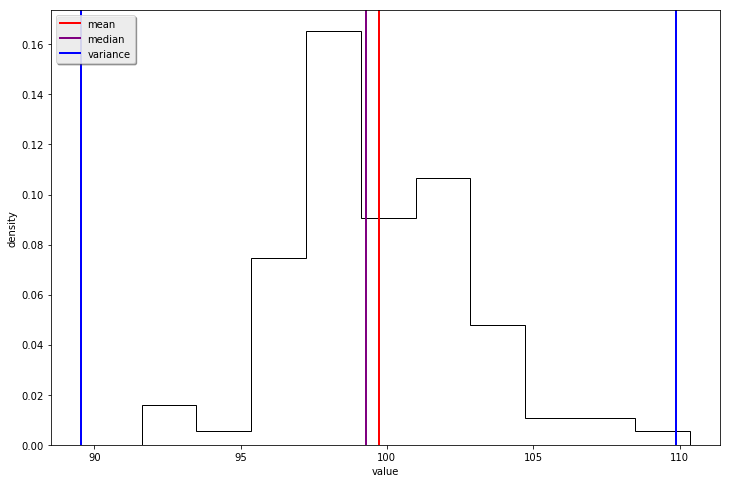

In [119]:
# All unbiased sample estimators

sample_size = 100

pop_mean = 100
pop_stdev = 3

population = stats.norm.rvs(size=sample_size, 
                        loc=pop_mean, 
                        scale=pop_stdev)

mean = st.mean(population)
median = st.median(population)
variance = st.variance(population)

plt.figure(figsize=(12,8))

plt.hist(population, histtype='step', edgecolor='black', bins='auto',  normed=True)

plt.axvline(mean, color='red', linewidth=2, label='mean')

plt.axvline(median, color='purple', linewidth=2, label='median')

plt.axvline(mean + variance, color='blue', linewidth=2, label='variance')
plt.axvline(mean - variance, color='blue', linewidth=2)

plt.legend(shadow=True)
plt.xlabel('value')
plt.ylabel('density')

plt.show()

In [15]:
pop_mean = 0
pop_stdev = 5


# Variance
sample_var = []
pop_var = []

# Standard deviation
sample_stdev_list = []
pop_stdev_list = []

for i in range(1000):
    
    sample = stats.norm.rvs(loc=pop_mean, scale=pop_stdev, size=20)

    # Variance
    sample_var.append(st.variance(sample))
    pop_var.append(st.pvariance(sample))
    
    # Standard Deviation
    sample_stdev_list.append(st.stdev(sample))
    pop_stdev_list.append(st.pstdev(sample))
    
# Variance
print("sample variance deviation: " + str(abs(st.mean(sample_var)-25)))
print("population variance deviation: " + str(abs(st.mean(pop_var)-25)))

# Standard Deviation
print("sample stdev deviation: " + str(abs(st.mean(sample_stdev_list)-5)))
print("population stdev deviation: " + str(abs(st.mean(pop_stdev_list)-5)))

sample variance deviation: 0.0348795076032
population variance deviation: 1.28313553222
sample stdev deviation: 0.06878850326024732
population stdev deviation: 0.1936495670520033


The simulation above shows that the sample variance is a better estimator for the population variance than the population variance of the sample is. There is a significant difference, at least at small sample sizes (e.g. 30).

Before we proceed to confidence intervals, we should first take a look at the distribution of sample statistics when we repeat the sampling process many times. Lets say we took 1000 samples from a distribution and computed the samples mean. Then we took that distribution of means and plotted them as a histogram. Which shape would it take? It actually takes a normal shape. This happens regardless of the underlying population distribution we sample from.

PS: There is no distribution for the samples modes here because there can be many values with equal frequencies in each sample.

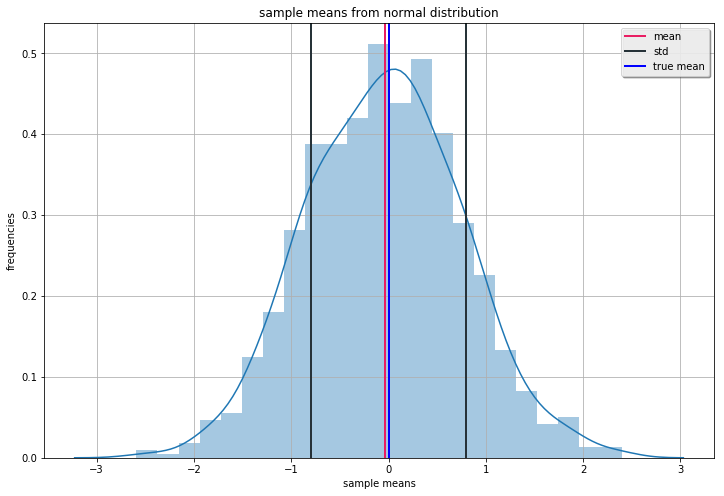

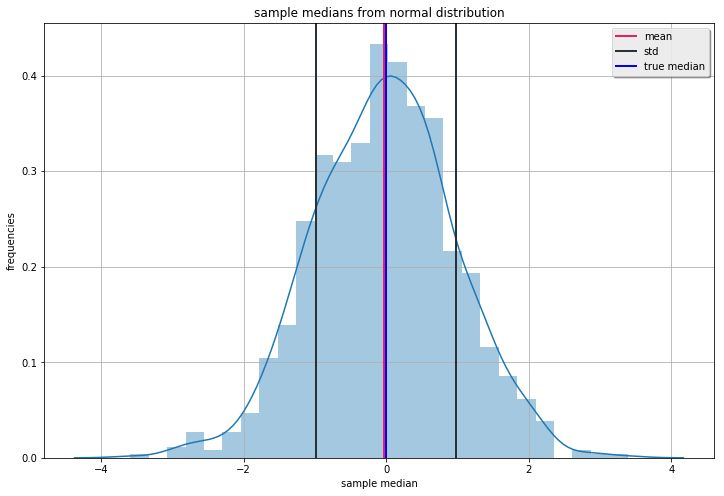

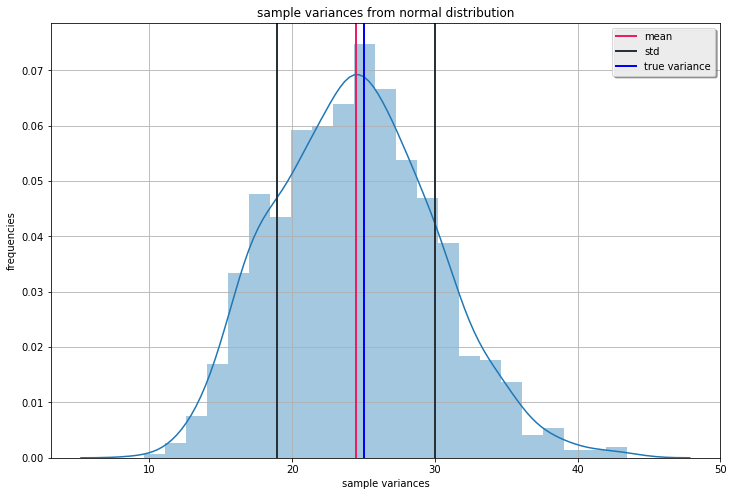

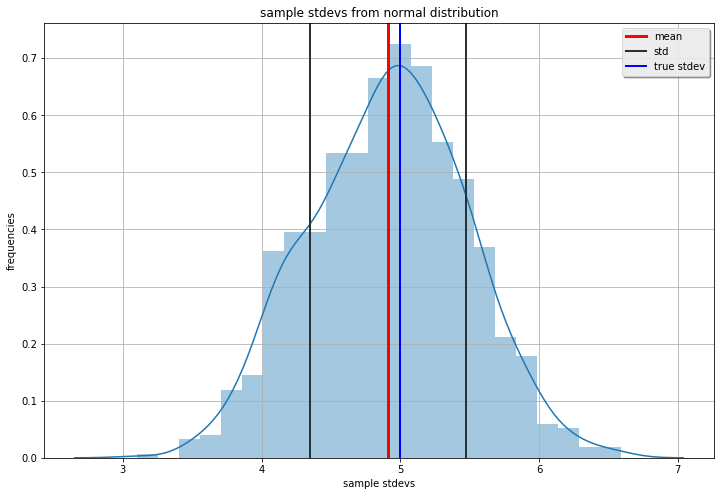

In [3]:
## Sample statistic distributions (from pop = normal distribution)

sample_size = 40
nr_of_samples = 1000

sample_means = []
sample_medians = []
sample_variances = []
sample_stdevs = []

for i in range(nr_of_samples):
    
    # Generate sample from normal distribution
    # loc = mean, scale = stdev
    norm_sample = stats.norm.rvs(size=sample_size, loc = 0, scale=5)
    
    # Gather the various point statistics
    sample_mean = st.mean(norm_sample)
    sample_median = st.median(norm_sample)
    sample_var = st.pvariance(norm_sample)
    sample_stdev = st.pstdev(norm_sample)
    
    # Append them to their respective lists
    sample_means.append(sample_mean)
    sample_medians.append(sample_median)
    sample_variances.append(sample_var)
    sample_stdevs.append(sample_stdev)
    
# Take the mean and stdev of each list

mean_of_means = st.mean(sample_means)
stdev_of_means = st.pstdev(sample_means)

mean_of_medians = st.median(sample_medians)
stdev_of_medians = st.pstdev(sample_medians)

mean_of_variances = st.mean(sample_variances)
stdev_of_variances = st.pstdev(sample_variances)

mean_of_stdevs = st.mean(sample_stdevs)
stdev_of_stdevs = st.pstdev(sample_stdevs)

# Sample mean distribution

plt.figure(1, figsize=(12,8))

#plt.hist(sample_means, bins = 'auto', histtype='stepfilled', color='#BDBDBD', edgecolor='black')
#sns.kdeplot(sample_means, bw=0.4, shade=True)
sns.distplot(sample_means)

plt.axvline(mean_of_means, color='#E91E63', linewidth=2, label='mean')
plt.axvline(+stdev_of_means, color='#263238', linewidth=2, label='std')
plt.axvline(-stdev_of_means, color='#263238', linewidth=2)
plt.axvline(0, color='blue', linewidth=2, label='true mean')

plt.xlabel('sample means')
plt.ylabel('frequencies')
plt.title('sample means from normal distribution')
plt.grid(True)
plt.legend(shadow=True)

# Sample median distribution
    
plt.figure(2, figsize=(12,8))

#plt.hist(sample_medians, bins = 'auto', histtype='stepfilled', color='#BDBDBD', edgecolor='black')
sns.distplot(sample_medians)

plt.axvline(mean_of_medians, color='#E91E63', linewidth=2, label='mean')
plt.axvline(stdev_of_medians, color='#263238', linewidth=2, label='std')
plt.axvline(-stdev_of_medians, color='#263238', linewidth=2)
plt.axvline(0, color='blue', linewidth=2, label='true median')

plt.xlabel('sample median')
plt.ylabel('frequencies')
plt.title('sample medians from normal distribution')
plt.grid(True)
plt.legend(shadow=True)

# Sample variance distribution
    
plt.figure(3, figsize=(12,8))

#plt.hist(sample_variances, bins = 'auto', histtype='stepfilled', color='#BDBDBD', edgecolor='black')
sns.distplot(sample_variances)

plt.axvline(mean_of_variances, color='#E91E63', linewidth=2, label='mean')
plt.axvline(mean_of_variances + stdev_of_variances, color='#263238', linewidth=2, label='std')
plt.axvline(mean_of_variances - stdev_of_variances, color='#263238', linewidth=2)
plt.axvline(25, color='blue', linewidth=2, label='true variance')

plt.legend(shadow=True)
plt.xlabel('sample variances')
plt.ylabel('frequencies')
plt.title('sample variances from normal distribution')
plt.grid(True)

# Sample stdev distribution

plt.figure(4, figsize=(12,8))

#plt.hist(sample_stdevs, bins = 'auto', histtype='stepfilled', color='#BDBDBD', edgecolor='black')
sns.distplot(sample_stdevs)

plt.axvline(mean_of_stdevs, color='red', linewidth=3, label='mean')
plt.axvline(mean_of_stdevs + stdev_of_stdevs, color='#263238', linewidth=2, label='std')
plt.axvline(mean_of_stdevs - stdev_of_stdevs, color='#263238', linewidth=2)
plt.axvline(5, color='blue', linewidth=2, label='true stdev')

plt.xlabel('sample stdevs')
plt.ylabel('frequencies')
plt.title('sample stdevs from normal distribution')
plt.grid(True)
plt.legend(shadow=True)

plt.show()

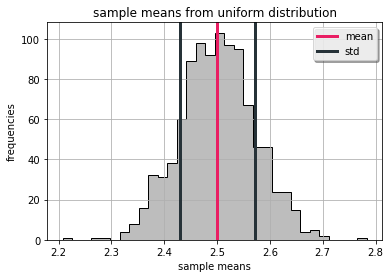

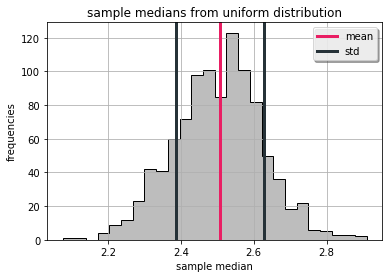

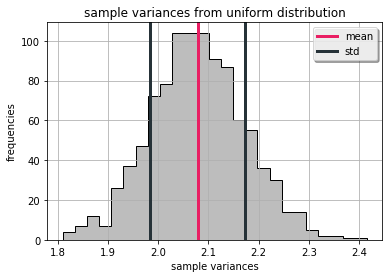

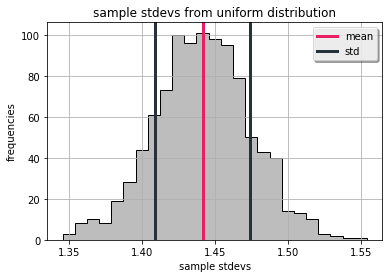

In [188]:
## Sample statistic distributions (from pop = uniform distribution)

sample_size = 400
nr_of_samples = 1000

sample_means = []
sample_medians = []
sample_variances = []
sample_stdevs = []

for i in range(nr_of_samples):
    
    # Generate sample from uniform distribution
    # loc = mean, scale = stdev
    uniform_sample = stats.uniform.rvs(size=sample_size, loc = 0, scale=5)
    
    # Gather the various point statistics
    sample_mean = st.mean(uniform_sample)
    sample_median = st.median(uniform_sample)
    sample_var = st.pvariance(uniform_sample)
    sample_stdev = st.pstdev(uniform_sample)
    
    # Append them to their respective lists
    sample_means.append(sample_mean)
    sample_medians.append(sample_median)
    sample_variances.append(sample_var)
    sample_stdevs.append(sample_stdev)
    
# Take the mean and stdev of each list

mean_of_means = st.mean(sample_means)
stdev_of_means = st.pstdev(sample_means)

mean_of_medians = st.median(sample_medians)
stdev_of_medians = st.pstdev(sample_medians)

mean_of_variances = st.mean(sample_variances)
stdev_of_variances = st.pstdev(sample_variances)

mean_of_stdevs = st.mean(sample_stdevs)
stdev_of_stdevs = st.pstdev(sample_stdevs)

# Sample mean distribution

plt.figure(1)

plt.hist(sample_means, bins = 'auto', histtype='stepfilled', color='#BDBDBD', edgecolor='black')

plt.axvline(mean_of_means, color='#E91E63', linewidth=3, label='mean')
plt.axvline(mean_of_means + stdev_of_means, color='#263238', linewidth=3, label='std')
plt.axvline(mean_of_means - stdev_of_means, color='#263238', linewidth=3)

plt.xlabel('sample means')
plt.ylabel('frequencies')
plt.title('sample means from uniform distribution')
plt.grid(True)
plt.legend(shadow=True)

# Sample median distribution
    
plt.figure(2)

plt.hist(sample_medians, bins = 'auto', histtype='stepfilled', color='#BDBDBD', edgecolor='black')

plt.axvline(mean_of_medians, color='#E91E63', linewidth=3, label='mean')
plt.axvline(mean_of_medians + stdev_of_medians, color='#263238', linewidth=3, label='std')
plt.axvline(mean_of_medians - stdev_of_medians, color='#263238', linewidth=3)

plt.xlabel('sample median')
plt.ylabel('frequencies')
plt.title('sample medians from uniform distribution')
plt.grid(True)
plt.legend(shadow=True)

# Sample variance distribution
    
plt.figure(3)

plt.hist(sample_variances, bins = 'auto', histtype='stepfilled', color='#BDBDBD', edgecolor='black')

plt.axvline(mean_of_variances, color='#E91E63', linewidth=3, label='mean')
plt.axvline(mean_of_variances + stdev_of_variances, color='#263238', linewidth=3, label='std')
plt.axvline(mean_of_variances - stdev_of_variances, color='#263238', linewidth=3)

plt.legend(shadow=True)
plt.xlabel('sample variances')
plt.ylabel('frequencies')
plt.title('sample variances from uniform distribution')
plt.grid(True)

# Sample stdev distribution

plt.figure(4)

plt.hist(sample_stdevs, bins = 'auto', histtype='stepfilled', color='#BDBDBD', edgecolor='black')

plt.axvline(mean_of_stdevs, color='#E91E63', linewidth=3, label='mean')
plt.axvline(mean_of_stdevs + stdev_of_stdevs, color='#263238', linewidth=3, label='std')
plt.axvline(mean_of_stdevs - stdev_of_stdevs, color='#263238', linewidth=3)

plt.xlabel('sample stdevs')
plt.ylabel('frequencies')
plt.title('sample stdevs from uniform distribution')
plt.grid(True)
plt.legend(shadow=True)

plt.show()

It is this normality property of sample parameter distributions that allow us to make confidence intervals.

We sample from populations and make point estimates. But point estimates do not contain information about their own uncertainty. This is where confidence intervals come in. Confidence intervals tells us that the population statistic, say, the mean, is located within the interval a certain percentage of times.

Below you can see the result of testing the confidence interval a large number of times. What we expect to happen is that the actual percentage of successes is very close to the theoretical percentage. We can of course trust established statistical packages to make the right computation, but it's good to check that we've set it all up correctly. And it is good to get some sensory feedback about how these thing behave in practice. Randomness is a fascinating phenomenon, and one we should get to know intimately.

In the second cell down, we visualize a smaller number of confidence intervals, to get an even better idea of how this works. The reason it's split into two individual cells is that the second one can't handle a large number of samples, (it works best with < 300 samples), and that since it has fewer samples it's actual sucess rate will vary more and thus not be as good a measure of having set everything up correctly.

When creating a confidence iterval, you chose between Z-interval and a T-interval depending upon the number of samples you have and if you know the population std or not. We do need to assume that the population is normally distributed, or we have to use other methods not described here.

In [81]:
## Confidence interval (unknown population stdev, normal dist)

sample_size = 500
nr_of_samples = 10000
truth_list = []
pop_mean = 10
pop_stdev = 50

for i in range(nr_of_samples):
    
    # Draw sample
    norm_sample = stats.norm.rvs(size=sample_size, loc = pop_mean, scale = pop_stdev)
    sample_mean = estimate_mean(norm_sample)
    sample_stdev = st.stdev(norm_sample)
    
    # Calculate confidence interval based on sample
    confidence_interval = stats.t.interval(alpha = 0.95, 
                                           df = sample_size-1,
                                           loc = sample_mean,
                                           scale = sample_stdev/math.sqrt(sample_size))

    # Count the number of hits
    if confidence_interval[0] < pop_mean and confidence_interval[1] > pop_mean:
        truth_list.append(True)
    else:
        truth_list.append(False)

# Display the successrate in percentage
print("The confidence interval contains the true population mean " + 
      str(st.mean(truth_list)*100) + "% of the time")

The confidence interval contains the true population mean 94.96% of the time


The true mean was within confidence interval 96.66666666666667 % of the time.


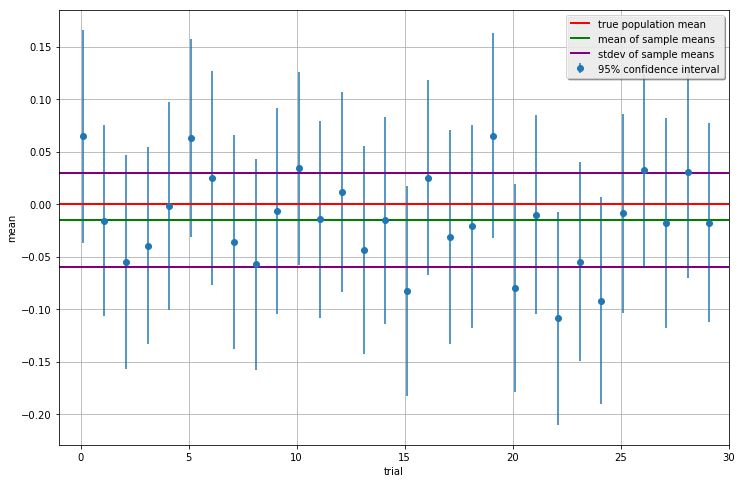

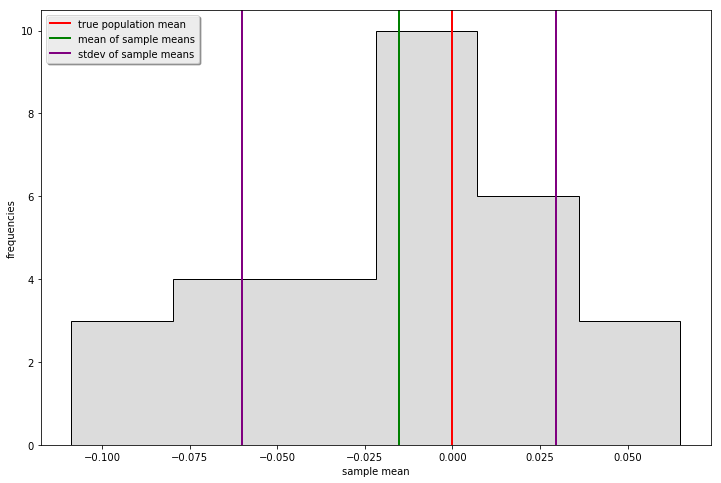

In [198]:
## Confidence intervals for normal distribution

sample_size = 400 # Must be >= 30 for t-interval to be valid
nr_of_samples = 30
confidence_level = 0.95

pop_mean = 0
pop_stdev = 1

intervals = []
sample_means = []
truth_list = []

for i in range(nr_of_samples):
    
    # Draw sample
    norm_sample = stats.norm.rvs(size=sample_size, loc = pop_mean, scale = pop_stdev)
    sample_mean = estimate_mean(norm_sample)
    sample_stdev = st.stdev(norm_sample)
    
    # Calculate confidence interval based on sample
    confidence_interval = stats.t.interval(alpha = confidence_level, 
                                           df = sample_size-1,
                                           loc = sample_mean,
                                           scale = sample_stdev/math.sqrt(sample_size))
    # Fill lists of intervals and sample means
    intervals.append(confidence_interval)
    sample_means.append(sample_mean)
    
    # Count the number of hits
    if confidence_interval[0] < pop_mean and confidence_interval[1] > pop_mean:
        truth_list.append(True)
    else:
        truth_list.append(False)

# Display hit rate for confidence intervals in percentage

print("The true mean was within confidence interval " + 
      str(100*st.mean(truth_list)) + " % of the time.")


# Figure for demonstrating how confidence intervals behave

plt.figure(1, figsize=(12,8))

plt.errorbar(x=np.arange(0.1, nr_of_samples, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o',
             label= str(int(100*confidence_level)) + '% confidence interval')

plt.hlines(xmin = 0-5, xmax = nr_of_samples+5, y = pop_mean, linewidth=2.0, color="red", label = 'true population mean')
plt.hlines(xmin = 0-5, xmax = nr_of_samples+5, y = st.mean(sample_means), linewidth=2.0, color="green", label = 'mean of sample means')
plt.hlines(xmin = 0-5, xmax = nr_of_samples+5, y = st.mean(sample_means) + st.pstdev(sample_means), color='purple', linewidth=2, label='stdev of sample means')
plt.hlines(xmin = 0-5, xmax = nr_of_samples+5, y = st.mean(sample_means) - st.pstdev(sample_means), color='purple', linewidth=2)

plt.xlabel('trial')
plt.ylabel('mean')
plt.xlim(0-1, nr_of_samples)
plt.legend(shadow=True)
plt.grid(True)

# Figure for showing distribution of sample means

plt.figure(2, figsize=(12,8))

plt.hist(sample_means, bins='auto', color='#DCDCDC', edgecolor='black', histtype='stepfilled')

plt.axvline(pop_mean, color='red', linewidth=2, label='true population mean')
plt.axvline(st.mean(sample_means), color='green', linewidth=2, label='mean of sample means')
plt.axvline(st.mean(sample_means) + st.pstdev(sample_means), color='purple', linewidth=2, label='stdev of sample means')
plt.axvline(st.mean(sample_means) - st.pstdev(sample_means), color='purple', linewidth=2)

plt.xlabel('sample mean')
plt.ylabel('frequencies')
plt.legend(shadow=True)

plt.show()

As you can see, the sample mean is often somewhat off. On average it's pretty close, but even with the confidence intervals the population mean is only inside it x percentage of times.

The true mean was within confidence interval 100 % of the time.


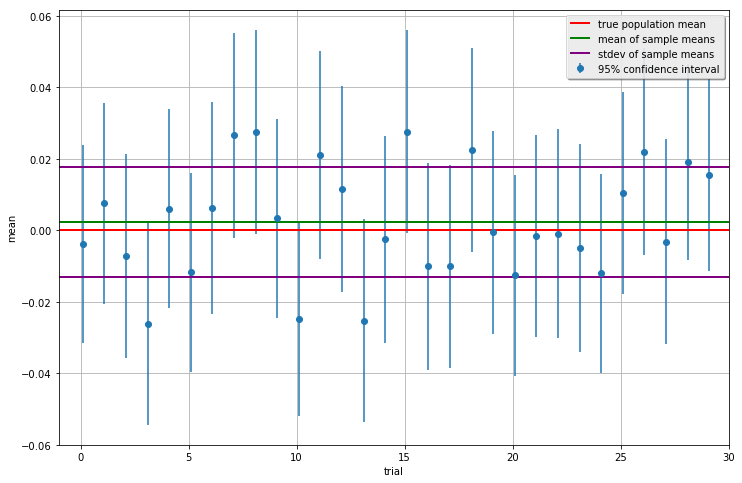

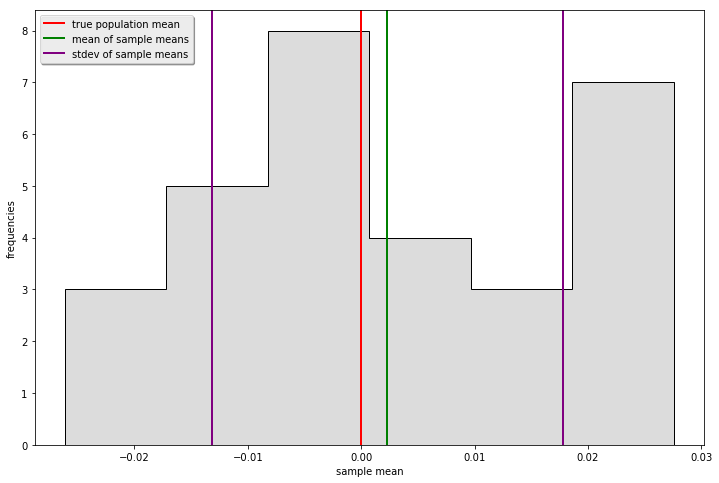

In [29]:
## Confidence intervals for uniform distribution

sample_size = 400
nr_of_samples = 30
confidence_level = 0.95

pop_mean = 0
pop_stdev = 1

intervals = []
sample_means = []
truth_list = []

for i in range(nr_of_samples):
    
    # Draw sample (loc have different meaning for different distributions)
    norm_sample = stats.uniform.rvs(size=sample_size, 
                                    loc = pop_mean - pop_stdev/2, 
                                    scale = pop_stdev)
    sample_mean = st.mean(norm_sample)
    sample_stdev = st.stdev(norm_sample)
    
    # Calculate confidence interval based on sample
    confidence_interval = stats.t.interval(alpha = confidence_level, 
                                           df = sample_size-1,
                                           loc = sample_mean,
                                           scale = sample_stdev/math.sqrt(sample_size))
    # Fill lists of intervals and sample means
    intervals.append(confidence_interval)
    sample_means.append(sample_mean)
    
    # Count the number of hits
    if confidence_interval[0] < pop_mean and confidence_interval[1] > pop_mean:
        truth_list.append(True)
    else:
        truth_list.append(False)

# Display hit rate for confidence intervals in percentage

print("The true mean was within confidence interval " + 
      str(100*st.mean(truth_list)) + " % of the time.")


# Figure for demonstrating how confidence intervals behave

plt.figure(1, figsize=(12,8))

plt.errorbar(x=np.arange(0.1, nr_of_samples, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o',
             label= str(int(100*confidence_level)) + '% confidence interval')

plt.hlines(xmin = 0-5, xmax = nr_of_samples+5, y = pop_mean, linewidth=2.0, color="red", label = 'true population mean')
plt.hlines(xmin = 0-5, xmax = nr_of_samples+5, y = st.mean(sample_means), linewidth=2.0, color="green", label = 'mean of sample means')
plt.hlines(xmin = 0-5, xmax = nr_of_samples+5, y = st.mean(sample_means) + st.pstdev(sample_means), color='purple', linewidth=2, label='stdev of sample means')
plt.hlines(xmin = 0-5, xmax = nr_of_samples+5, y = st.mean(sample_means) - st.pstdev(sample_means), color='purple', linewidth=2)

plt.xlabel('trial')
plt.ylabel('mean')
plt.xlim(0-1, nr_of_samples)
plt.legend(shadow=True)
plt.grid(True)

# Figure for showing distribution of sample means

plt.figure(2, figsize=(12,8))

plt.hist(sample_means, bins='auto', color='#DCDCDC', edgecolor='black', histtype='stepfilled')

plt.axvline(pop_mean, color='red', linewidth=2, label='true population mean')
plt.axvline(st.mean(sample_means), color='green', linewidth=2, label='mean of sample means')
plt.axvline(st.mean(sample_means) + st.pstdev(sample_means), color='purple', linewidth=2, label='stdev of sample means')
plt.axvline(st.mean(sample_means) - st.pstdev(sample_means), color='purple', linewidth=2)

plt.xlabel('sample mean')
plt.ylabel('frequencies')
plt.legend(shadow=True)

plt.show()

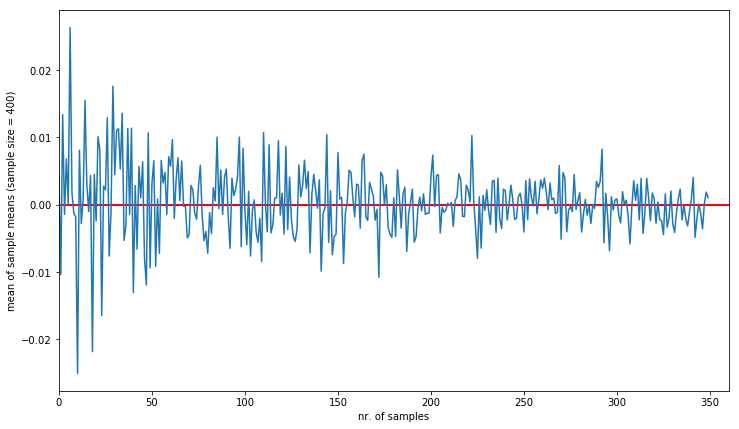

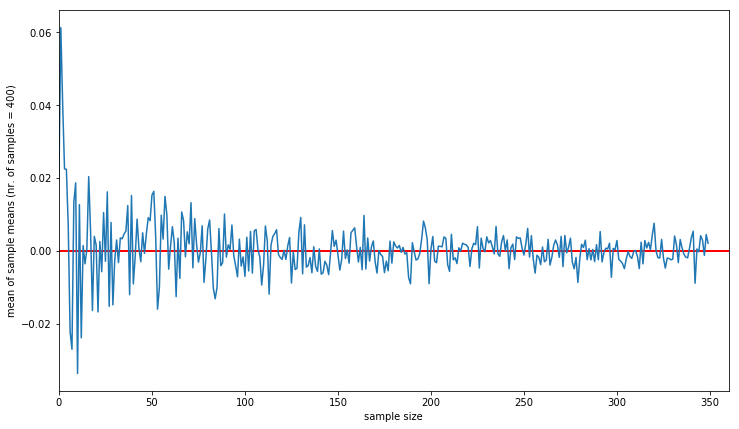

In [2]:
"""
Let's take a look at how close the mean of the sample means is to
the actual mean, depending upon sample size and number of samples.

Then let's take a look at confidence interval length as a function of 
same size, number of sample and confidence level.

Then let's examine how often the sample mean is within 10% of the actual
mean.
"""

import scipy.stats as stats
import statistics as st
import matplotlib.pyplot as plt

## 1. Closeness of mean as function of sample size and number

sample_size = 400
nr_of_samples = 1
nr_of_points = 350
start_point = nr_of_samples
pop_mean = 0
pop_stdev = 1


mean_of_means = []

for i in range(nr_of_points):
    
    sample_means = []
    
    for i in range(start_point,nr_of_samples+5):

        # Draw sample (loc have different meaning for different distributions)
        norm_sample = stats.norm.rvs(size=sample_size, 
                                        loc = pop_mean, 
                                        scale = pop_stdev)

        sample_mean = st.mean(norm_sample)
        sample_means.append(sample_mean)
        
    nr_of_samples += 1
    mean_of_means.append(st.mean(sample_means))

plt.figure(1,figsize=(12,7))

plt.plot(mean_of_means, label='')
plt.hlines(xmin = 0-20, xmax = nr_of_points+20, y = pop_mean, linewidth=2.0, color="red", label = 'true population mean')
plt.xlim(0, nr_of_points+10)

plt.xlabel("nr. of samples")
plt.ylabel("mean of sample means (sample size = 400)")

plt.show()

## 2. Closeness of mean of means based upon sample size

sample_size = 1
nr_of_samples = 400
start_point = sample_size
nr_of_points = 350

pop_mean = 0
pop_stdev = 1


mean_of_means = []

for i in range(nr_of_points):
    
    sample_means = []
    
    for i in range(start_point+1, nr_of_points):

        # Draw sample (loc have different meaning for different distributions)
        norm_sample = stats.norm.rvs(size=sample_size, 
                                        loc = pop_mean, 
                                        scale = pop_stdev)

        sample_mean = st.mean(norm_sample)
        sample_means.append(sample_mean)
        
    sample_size += 1
    mean_of_means.append(st.mean(sample_means))

plt.figure(2,figsize=(12,7))

plt.plot(mean_of_means, label='')
plt.hlines(xmin = 0-20, xmax = nr_of_points+20, y = pop_mean, linewidth=2.0, color="red", label = 'true population mean')
plt.xlim(0, nr_of_points+10)

plt.xlabel("sample size")
plt.ylabel("mean of sample means (nr. of samples = 400)")

plt.show()

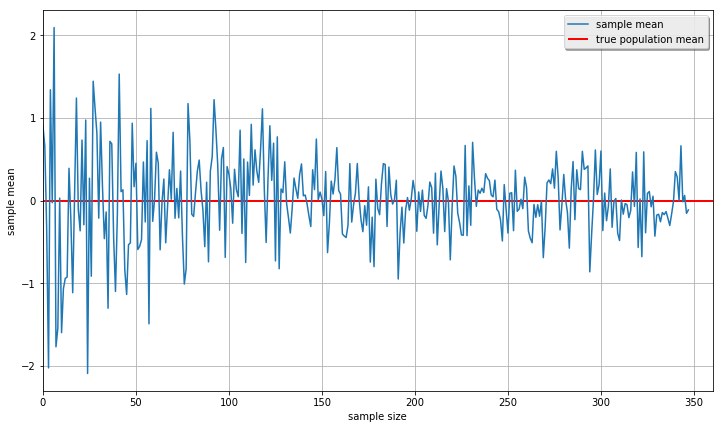

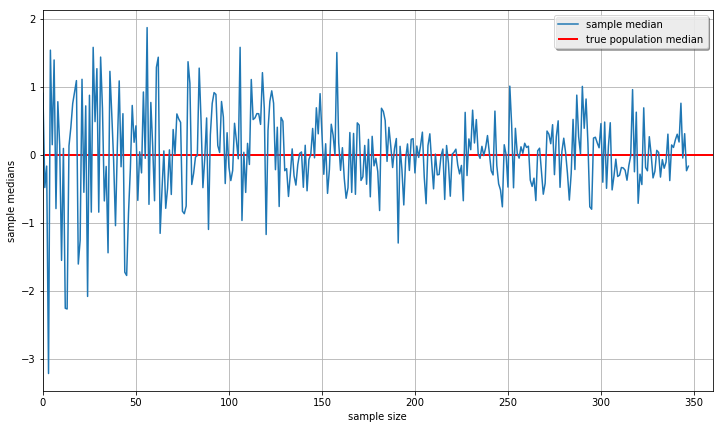

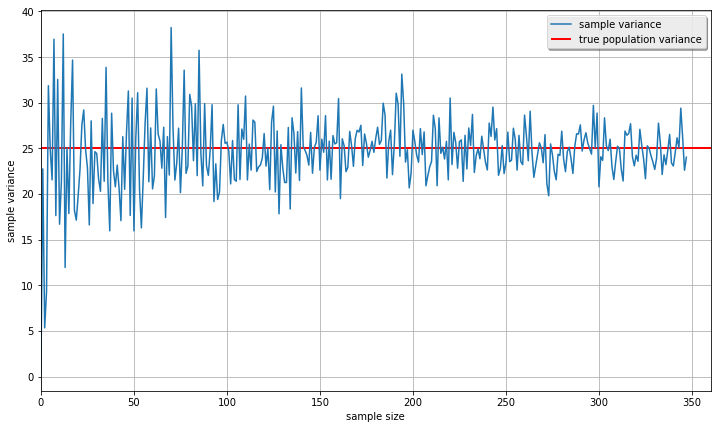

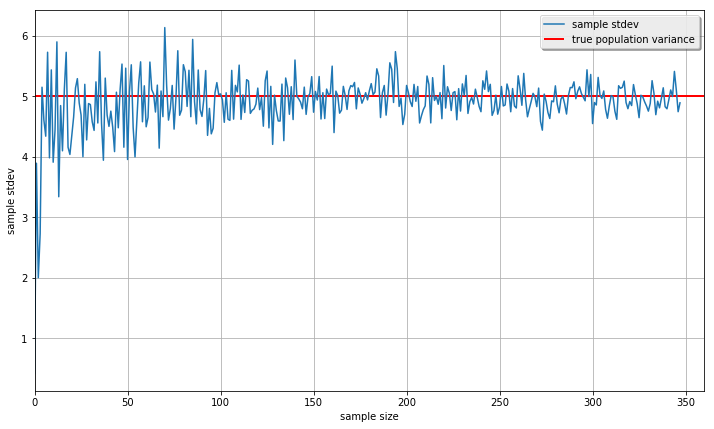

In [10]:
"""
How does regular sample statistics compare to population parameter while
sample size increases?

They all converge toward the true population parameter.
"""

sample_size = 2 # variance requires atleast 2
start_point = sample_size
nr_of_points = 350

pop_mean = 0
pop_stdev = 5
pop_var = pop_stdev ** 2

sample_means = []
sample_medians = []
sample_variance = []
sample_std = []
    
for i in range(start_point, nr_of_points):

    # Draw sample (loc have different meaning for different distributions)
    norm_sample = stats.norm.rvs(size=sample_size, 
                                 loc = pop_mean, 
                                 scale = pop_stdev)

    sample_means.append(st.mean(norm_sample))
    sample_medians.append(st.median(norm_sample))
    sample_variance.append(st.variance(norm_sample))
    sample_std.append(st.pstdev(norm_sample))
        
    sample_size += 1

# Mean
plt.figure(1,figsize=(12,7))

plt.plot(sample_means, label='sample mean')
plt.hlines(xmin = 0-20, xmax = nr_of_points+20, y = pop_mean, linewidth=2.0, color="red", label = 'true population mean')
plt.xlim(0, nr_of_points+10)

plt.xlabel("sample size")
plt.ylabel("sample mean")
plt.legend(shadow=True)
plt.grid()

# Median
plt.figure(2,figsize=(12,7))

plt.plot(sample_medians, label='sample median')
plt.hlines(xmin = 0-20, xmax = nr_of_points+20, y = pop_mean, linewidth=2.0, color="red", label = 'true population median')
plt.xlim(0, nr_of_points+10)

plt.xlabel("sample size")
plt.ylabel("sample medians")
plt.legend(shadow=True)
plt.grid()

# Variance
plt.figure(3,figsize=(12,7))

plt.plot(sample_variance, label='sample variance')
plt.hlines(xmin = 0-20, xmax = nr_of_points+20, y = pop_var, linewidth=2.0, color="red", label = 'true population variance')
plt.xlim(0, nr_of_points+10)

plt.xlabel("sample size")
plt.ylabel("sample variance")
plt.legend(shadow=True)
plt.grid()

# Standard Deviations
plt.figure(4,figsize=(12,7))

plt.plot(sample_std, label='sample stdev')
plt.hlines(xmin = 0-20, xmax = nr_of_points+20, y = pop_stdev, linewidth=2.0, color="red", label = 'true population variance')
plt.xlim(0, nr_of_points+10)

plt.xlabel("sample size")
plt.ylabel("sample stdev")
plt.legend(shadow=True)
plt.grid()

plt.show()

This is as expected, as the formulas tell us. Seeing it in action contains more information about the behavior of the sample statistics than the formula does, except about where the sample statistic is in the limit, in which case the formula contains more information. From these graphs you can, as well, easily see that the sample parameters are normally distributed.

#### Hypothesis Testing
* https://en.wikipedia.org/wiki/Statistical_hypothesis_testing
* https://en.wikipedia.org/wiki/Student%27s_t-test
* https://en.wikipedia.org/wiki/P-value
* 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.ttest_onesamp.html
* https://en.wikipedia.org/wiki/Checking_whether_a_coin_is_fair
* https://onlinecourses.science.psu.edu/stat414/node/199 (good course)

In [231]:
# T-test (likelihood test) for one sample (data) against population mean (null)

pop_mean = 0
pop_stdev = 1

null_mean = 0.7

confidence_level = 0.1

trials = 1000
sucesses = 0

for i in range(trials):
    
    sample = stats.norm.rvs(size=30, loc=pop_mean, scale=1)

    t_test = stats.mstats.ttest_onesamp(sample, null_mean)

    pvalue = t_test[1]

    if pvalue >= confidence_level:
        #print("REJECTED!")
        sucesses += 1
        
sucess_rate = sucesses/trials
print("sucess rate       : " + str(sucess_rate))
print("confidence level  : " + str(confidence_level))

if sucess_rate < confidence_level:
    
    print("REJECTION!")

else:
    
    print("SURVIVAL!")

sucess rate       : 0.022
confidence level  : 0.1
REJECTION!


### Bayesian Statistics

#### Cookie Problem (Election Theme) (Binomial)

If you have ever partaken in the election season you know about election forcasts. They will claim something like "Trump (28.6%) vs. Hillary (71.4%)", like on Nov. 8, right on the election's dorstep. When the election results come in, how do you know if the the probabilistic claim was correct or not? You use bayes theorem.

The chance that Trump wins can be any number from 0 to 1. Each percentage represents one possible prediction. That means there are an infinite number of possible predictions. Instead of doing complicated integration, we will do a so-called grid aproximation. We decide upon a desired level of precision, e.i. how many equally likely hypotheses we wish to consider in light of the new evidence (e.g. who won). Then we calculate the posterior probability of each hypothesis. Since each hypothesis claims different things, they change unequally in likelihood.

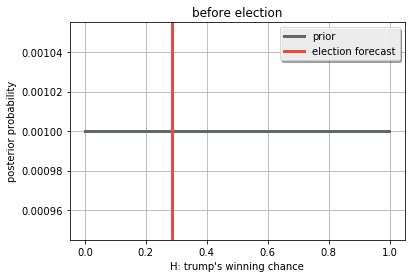

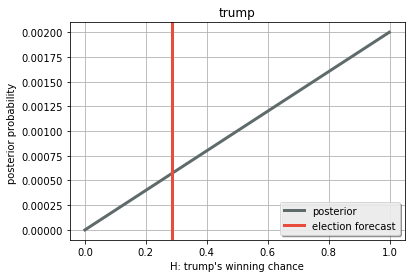

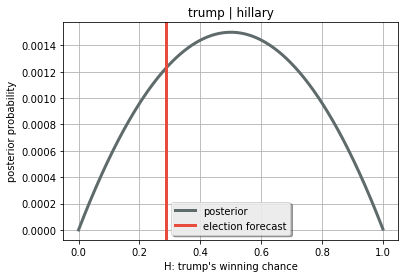

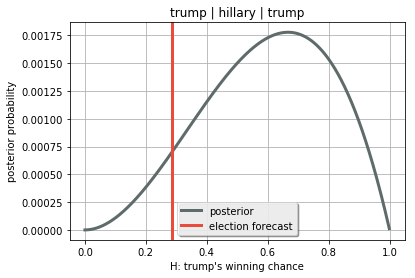

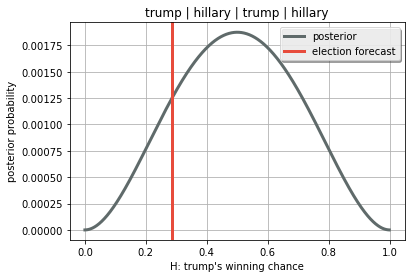

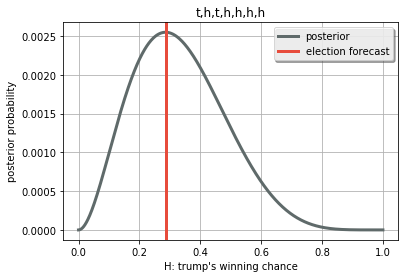

In [112]:
from thinkbayes2 import Pmf
import matplotlib.pyplot as plt

global grid_points
grid_points = 1000 # 100 is a reasonable number, FiveThirtyEight used 1000

class Cookie(Pmf):
    
    def __init__(self, hypos):
        Pmf.__init__(self)
        for hypo in hypos:
            self.Set(hypo, 1)
        self.Normalize()
        
    def Update(self, data):
        for hypo in self.Values():
            like = self.Likelihood(data, hypo)
            self.Mult(hypo, like)
        self.Normalize()
        
    mixes = {}
    for i in range(grid_points):
        mixes[i/grid_points] = dict(trump=i/grid_points, 
                                    hillary=1-(i/grid_points))
    
    def Likelihood(self, data, hypo):
        mix = self.mixes[hypo]
        like = mix[data]
        return like
    
def generate_plot_axes():
    index_hyp = []
    posterior = []
    for hypo, prob in pmf.Items():
        index_hyp.append(hypo)
        posterior.append(prob)
    return index_hyp, posterior

# Shared variables
plot_color = '#5f6a6a'
line_color = '#e74c3c'
    
# Set-up procedure

hypos = []
for i in range(grid_points):
    hypos.append(i/grid_points)
    
pmf = Cookie(hypos)

x, y = generate_plot_axes()

plt.figure(1)

plt.plot(x, y, linewidth=3, color=plot_color, label='prior')
plt.axvline(0.286, color=line_color, linewidth=3, label='election forecast')

plt.xlabel("H: trump's winning chance")
plt.ylabel('posterior probability')
plt.title('before election')
plt.legend(shadow=True)
plt.grid(True)

# Posterior dist after 1st update

pmf.Update('trump')

x, y = generate_plot_axes()

plt.figure(2)

plt.plot(x, y, linewidth=3, color=plot_color, label='posterior')
plt.axvline(0.286, color=line_color, linewidth=3, label='election forecast')

plt.xlabel("H: trump's winning chance")
plt.ylabel('posterior probability ')
plt.title('trump')
plt.legend(shadow=True)
plt.grid(True)

# Posterior dist after 2nd update

"""
Now, lets for the sake of argument say that the election was a repeatable
random computer simulation that we could run as many times as we wanted to.
Real life is, at least on macroscopic level, deterministic. But with a
computer we can create probibalistic models that has the same initial
conditions but differing endpoints. Let's say we ran the election again,
and this time hillary won. How should the posterior distribution look like
now?
"""

pmf.Update('hillary')

x, y = generate_plot_axes()

plt.figure(3)

plt.plot(x, y, linewidth=3, color=plot_color, label='posterior')
plt.axvline(0.286, color=line_color, linewidth=3, label='election forecast')

plt.xlabel("H: trump's winning chance")
plt.ylabel('posterior probability')
plt.title('trump | hillary')
plt.legend(shadow=True)
plt.grid(True)

# and if Trump wins once more

pmf.Update('trump')
    
x, y = generate_plot_axes()

plt.figure(4)

plt.plot(x, y, linewidth=3, color=plot_color, label='posterior')
plt.axvline(0.286, color=line_color, linewidth=3, label='election forecast')

plt.xlabel("H: trump's winning chance")
plt.ylabel('posterior probability')
plt.title('trump | hillary | trump')
plt.legend(shadow=True)
plt.grid(True)

plt.show()

# and if Hillary wins once more aswell

pmf.Update('hillary')
    
x, y = generate_plot_axes()

plt.figure(5)

plt.plot(x, y, linewidth=3, color=plot_color, label='posterior')
plt.axvline(0.286, color=line_color, linewidth=3, label='election forecast')

plt.xlabel("H: trump's winning chance")
plt.ylabel('posterior probability')
plt.title('trump | hillary | trump | hillary')
plt.legend(shadow=True)
plt.grid(True)

plt.show()

# and if Hillary wins once more aswell

for i in range(3):
    pmf.Update('hillary')
    
x, y = generate_plot_axes()

plt.figure(6)
plt.plot(x, y, linewidth=3, color=plot_color, label='posterior')
plt.axvline(0.286, color=line_color, linewidth=3, label='election forecast')

plt.xlabel("H: trump's winning chance")
plt.ylabel('posterior probability')
plt.title('t,h,t,h,h,h,h')
plt.legend(shadow=True)
plt.grid(True)

plt.show()

As is quite clear after the seeing the first election result when Trump won, given equal priors the prediction was less likely to be true. In reality, the prior distribution was definitely not uniform for FiveThirtyEight, which is why the chose that particular hypothesis as the most likely, but we'll deal with that further down.

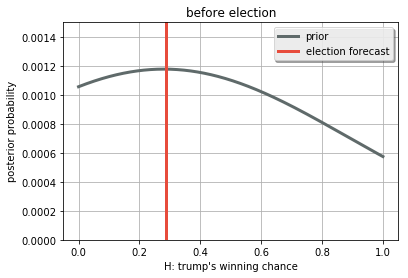

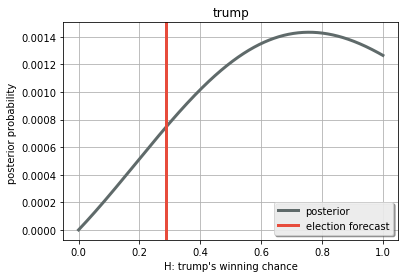

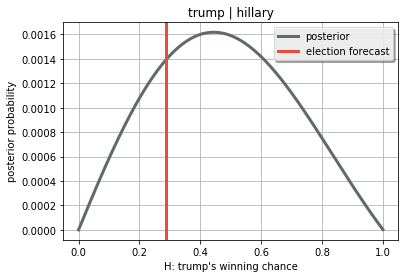

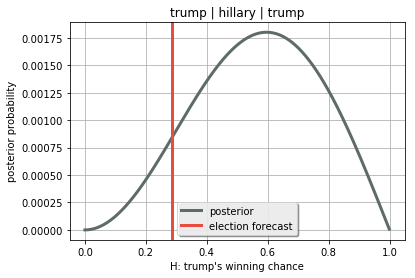

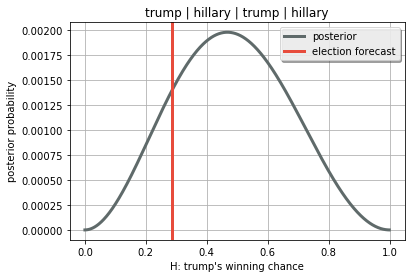

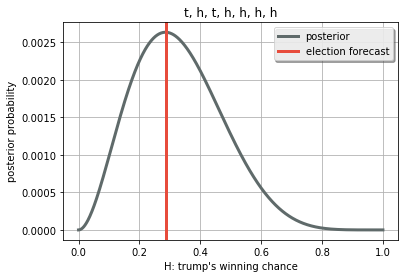

In [123]:
"""
This time we'll be using a more informative prior distribution, that is
more likely represents FiveThrityEight's actual beliefs at that point."
"""

from thinkbayes2 import Pmf
import matplotlib.pyplot as plt

global grid_points
grid_points = 1000 # 100 is a reasonable number, FiveThirtyEight used 1000

class Cookie(Pmf):
    
    def __init__(self, hypos):
        Pmf.__init__(self)
        counter = 0
        for hypo in hypos:
            self.Set(hypo, stats.norm.pdf(counter, loc=2.8, scale=6)) # was 1, as it should be
            counter += grid_points/(grid_points*100)
        self.Normalize()
        
    def Update(self, data):
        for hypo in self.Values():
            like = self.Likelihood(data, hypo)
            self.Mult(hypo, like)
        self.Normalize()
        
    mixes = {}
    for i in range(grid_points):
        mixes[i/grid_points] = dict(trump=i/grid_points, hillary=1-(i/grid_points))
    
    def Likelihood(self, data, hypo):
        mix = self.mixes[hypo]
        like = mix[data]
        return like
    
def generate_plot_axes():
    index_hyp = []
    posterior = []
    for hypo, prob in pmf.Items():
        index_hyp.append(hypo)
        posterior.append(prob)
    return index_hyp, posterior

# Shared variables
plot_color = '#5f6a6a'
line_color = '#e74c3c'
    
# Set-up procedure

hypos = []
for i in range(grid_points):
    hypos.append(i/grid_points)
    
pmf = Cookie(hypos)

x, y = generate_plot_axes()

plt.figure(1)

plt.plot(x, y, linewidth=3, color=plot_color, label='prior')
plt.axvline(0.286, color=line_color, linewidth=3, label='election forecast')

plt.xlabel("H: trump's winning chance")
plt.ylabel('posterior probability')
plt.ylim(0,1.5/grid_points)
plt.title('before election')
plt.legend(shadow=True)
plt.grid(True)

# Posterior dist after 1st update

pmf.Update('trump')

x, y = generate_plot_axes()

plt.figure(2)

plt.plot(x, y, linewidth=3, color=plot_color, label='posterior')
plt.axvline(0.286, color=line_color, linewidth=3, label='election forecast')

plt.xlabel("H: trump's winning chance")
plt.ylabel('posterior probability ')
plt.title('trump')
plt.legend(shadow=True)
plt.grid(True)

# Posterior dist after 2nd update

"""
Now, lets for the sake of argument say that the election was a repeatable
random computer simulation that we could run as many times as we wanted it to.
Real life is, at least on the macroscopic level, deterministic. But with a
computer we can create probibalistic models that has the same initial
conditions but differing endpoints. Let's say we ran the election again,
and this time hillary won. How should the posterior distribution look like
now?
"""

pmf.Update('hillary')

x, y = generate_plot_axes()

plt.figure(3)

plt.plot(x, y, linewidth=3, color=plot_color, label='posterior')
plt.axvline(0.286, color=line_color, linewidth=3, label='election forecast')

plt.xlabel("H: trump's winning chance")
plt.ylabel('posterior probability')
plt.title('trump | hillary')
plt.legend(shadow=True)
plt.grid(True)

# and if Trump wins once more

pmf.Update('trump')
    
x, y = generate_plot_axes()

plt.figure(4)

plt.plot(x, y, linewidth=3, color=plot_color, label='posterior')
plt.axvline(0.286, color=line_color, linewidth=3, label='election forecast')

plt.xlabel("H: trump's winning chance")
plt.ylabel('posterior probability')
plt.title('trump | hillary | trump')
plt.legend(shadow=True)
plt.grid(True)

plt.show()

# and if Hillary wins once more aswell

pmf.Update('hillary')
    
x, y = generate_plot_axes()

plt.figure(5)

plt.plot(x, y, linewidth=3, color=plot_color, label='posterior')
plt.axvline(0.286, color=line_color, linewidth=3, label='election forecast')

plt.xlabel("H: trump's winning chance")
plt.ylabel('posterior probability')
plt.title('trump | hillary | trump | hillary')
plt.legend(shadow=True)
plt.grid(True)

plt.show()

# and if Hillary wins once more aswell

for i in range(3):
    pmf.Update('hillary')
    
x, y = generate_plot_axes()

plt.figure(6)
plt.plot(x, y, linewidth=3, color=plot_color, label='posterior')
plt.axvline(0.286, color=line_color, linewidth=3, label='election forecast')

plt.xlabel("H: trump's winning chance")
plt.ylabel('posterior probability')
plt.title('t, h, t, h, h, h, h')
plt.legend(shadow=True)
plt.grid(True)

plt.show()

As can be seen quite clearly, the prior initially matters to a large degree, but diminishes in importance over the long run. As we do repeated updates, the prior's proportional impact dwindle. If you only have one shot, you should think carefully about the prior distribution, but after, say, 5 trials, it matters little, and you could just go for the uniform distribution. In repeated experiments the posterior of the preceding experiment acts as the prior to the next one.

A probabilistic election prediction is a scenario where the prior matters. You can only run the election once, and elections are so dependent upon circumstances that a second election with the same candidates some years later will differ substantially.

A fair coin is 50/50. A unfair coin is everything except 50/50. Unlike an election, a coin can be flipped as many times as we wish. Thus, we can just go for a uniform distribution, speculation about biasedness avoided.

#### Statistics
Then there is Bayesian and Frequentist statistics. It is in statistics that the distinction between Bayesian and Frequentist becomes apparent in the methods and practices themselves. But they are not really competition, more like compliments.

##### Frequentist

Frequentist statistics involve hypothesis testing and confidence intervals.

##### Bayesian

Bayesian statistics about updating on evidence through Bayes' Theorem to arrive at a posterior distribution. Much of the work goes into modeling; deciding upon priors and likelihood functions.

1. https://www.quora.com/What-is-the-difference-between-Bayesian-and-frequentist-statisticians
2. https://www.quora.com/For-a-non-expert-what-is-the-difference-between-Bayesian-and-frequentist-approaches/answer/Jason-Eisner
3. https://en.wikipedia.org/wiki/Frequentist_inference
4. https://en.wikipedia.org/wiki/Bayesian_inference

### Random Variables
A random variable is a function that involves a random element. f(x) = (1 if x > 10, 0 if x <= 10) is a random variable.